<font face="Times New Roman" size=5> <div dir=rtl align="center"> <br> <img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150"> <br> <font face="Times New Roman" size=4 align=center> Sharif University of Technology - Department of Electrical Engineering </font> <br> <font color="#008080" size=6> Introduction to Machine Learning </font> <hr/> <font color="#80a080" size=5> Assignment 1: Probability <br> </font> <font size=5> Instructor: Dr. S. Amini <br> </font> <font size=4> Fall 2026 <br> </font> <hr> </div></font>

> - Full Name: **[Mohammad Mobin]**
> - Student ID: **[Jelodar]**

## Generating Random Variables

In this part, using only the function <code>np.random.random()</code> (which yields a <code>Uniform(0,1)</code> random variable), you must generate several well-known random variables. For each distribution, write a function that takes the necessary parameters and returns a single random draw from that distribution.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def bernoulli(p):
    u = np.random.random()
    return 1 if u < p else 0

def binomial(n, p):
    return sum(bernoulli(p) for _ in range(n))

def geometric(p):
    u = np.random.random()
    return int(np.floor(np.log(u) / np.log(1 - p))) + 1

To validate your implementations, generate <code>num_of_samples</code> draws from each distribution (with specified parameters) and plot their histograms. Compare the resulting histograms to those of the corresponding theoretical distributions. You may adjust <code>num_of_samples</code> to obtain clearer results.
<br>

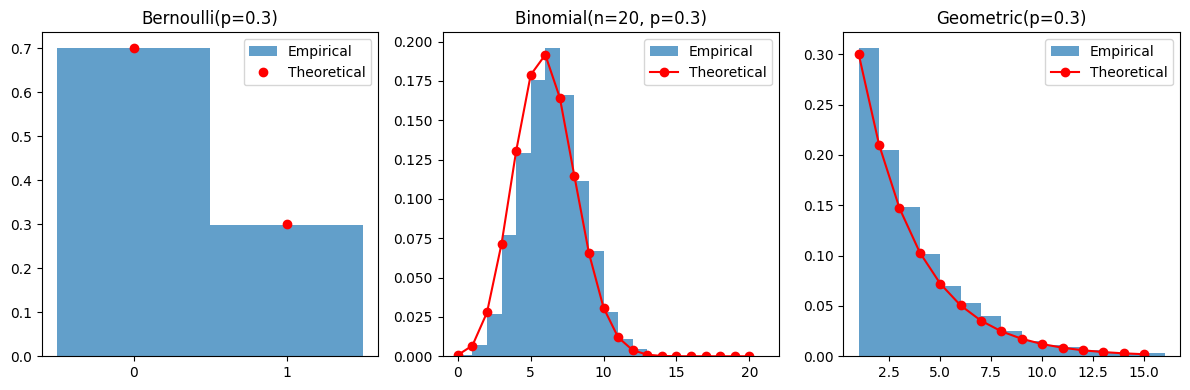

In [ ]:
num_of_samples = 10000
p_bern = 0.3
bern_samples = [bernoulli(p_bern) for _ in range(num_of_samples)]

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(bern_samples, bins=[-0.5, 0.5, 1.5], density=True, alpha=0.7, label='Empirical')
plt.title(f'Bernoulli(p={p_bern})')
plt.xticks([0, 1])
theoretical_pmf = [1-p_bern, p_bern]
plt.plot([0, 1], theoretical_pmf, 'ro', label='Theoretical')
plt.legend()

n_binom = 20
p_binom = 0.3
binom_samples = [binomial(n_binom, p_binom) for _ in range(num_of_samples)]

plt.subplot(1, 3, 2)
plt.hist(binom_samples, bins=range(n_binom + 2), density=True, alpha=0.7, label='Empirical')
plt.title(f'Binomial(n={n_binom}, p={p_binom})')
from scipy.stats import binom
x = np.arange(0, n_binom + 1)
theoretical_pmf = binom.pmf(x, n_binom, p_binom)
plt.plot(x, theoretical_pmf, 'ro-', label='Theoretical')
plt.legend()

p_geom = 0.3
geom_samples = [geometric(p_geom) for _ in range(num_of_samples)]

plt.subplot(1, 3, 3)
max_k = max(15, int(np.percentile(geom_samples, 99)))  # Show up to 99th percentile
plt.hist(geom_samples, bins=range(1, max_k + 2), density=True, alpha=0.7, label='Empirical')
plt.title(f'Geometric(p={p_geom})')

x = np.arange(1, max_k + 1)
theoretical_pmf = [(1-p_geom)**(k-1) * p_geom for k in x]
plt.plot(x, theoretical_pmf, 'ro-', label='Theoretical')
plt.legend()

plt.tight_layout()
plt.show()

## Central Limit Theorem (CLT) Demonstration

We will reuse one random seed, one list of sample sizes (e.g., 1, 3, 5, 10, 30, 50, 100), and one large repetition count (like 10,000). Keeping these settings fixed lets us compare distributions fairly.

For each distribution and each value of <code>n</code> in <code>n_list</code>:
1. Draw many independent groups of size <code>n</code> and record their sample means.  
2. Standardize every mean with  
    $$Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}}.$$
3. Plot a density histogram of the standardized values and overlay the standard normal curve.  
4. Label axes, titles, and legends, and note how the histogram moves closer to the normal curve as <code>n</code> grows.

</div>


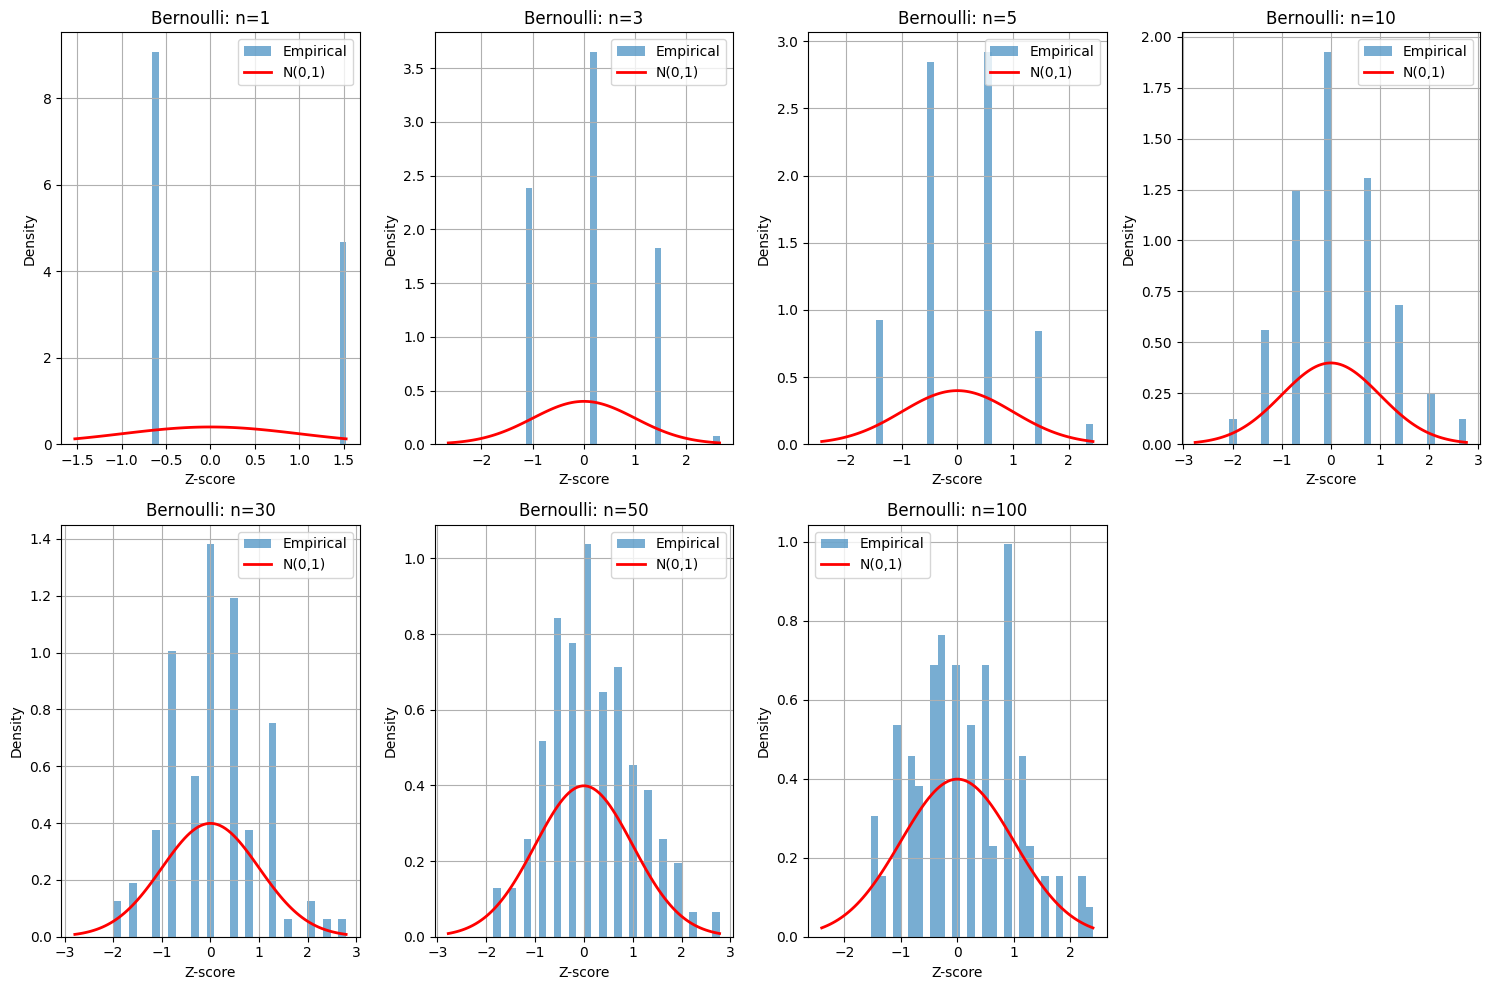

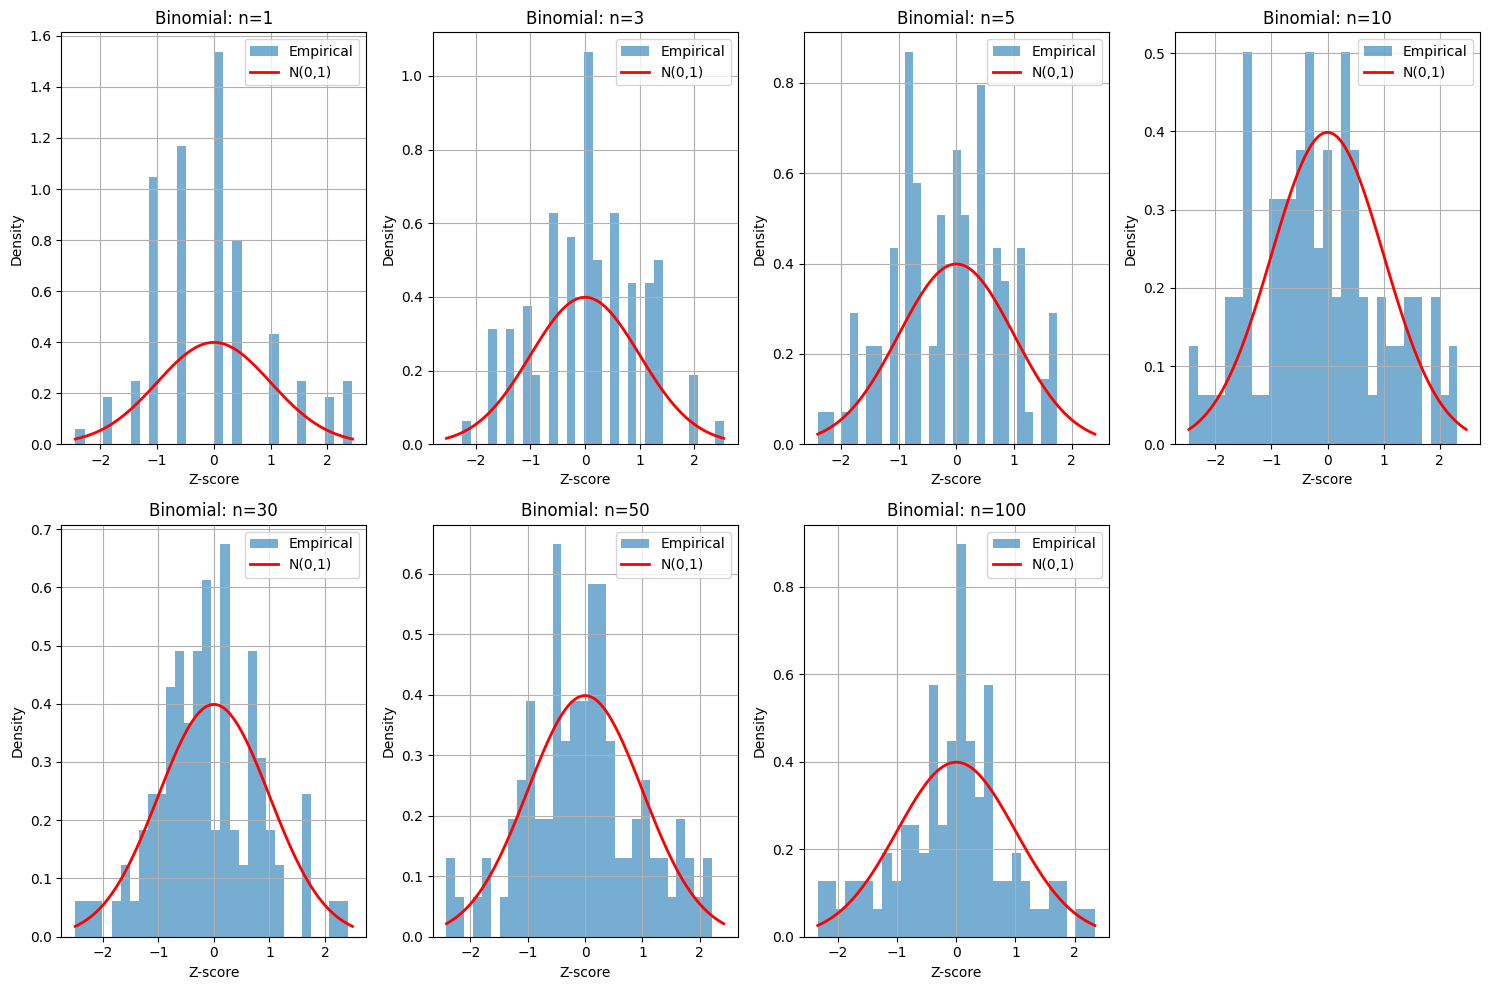

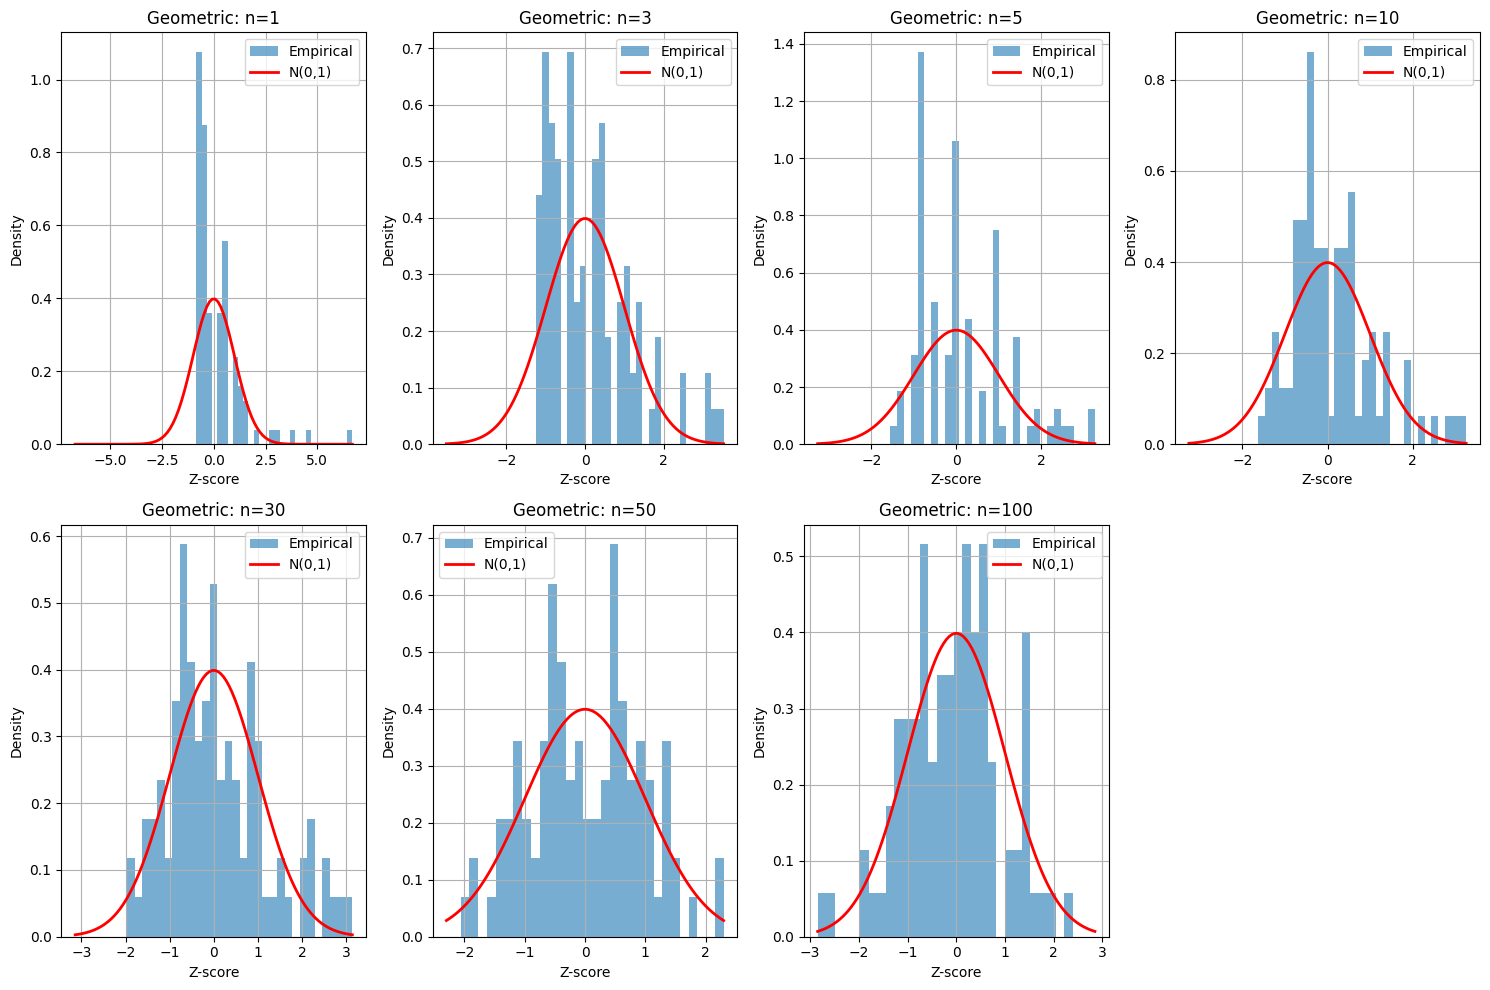

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

num_of_samples = 10000

n_list = [1, 3, 5, 10, 30, 50, 100]

p_bernoulli = 0.3
n_binomial = 20
p_binomial = 0.3
p_geometric = 0.3

bern_samples = np.array([bernoulli(p_bernoulli) for _ in range(num_of_samples)])
binom_samples = np.array([binomial(n_binomial, p_binomial) for _ in range(num_of_samples)])
geom_samples = np.array([geometric(p_geometric) for _ in range(num_of_samples)])

def clt_check(samples, mu, sigma, n_list, dist_name):
    """
    For each n in n_list:
        1. Draw random groups of size n.
        2. Compute sample means.
        3. Standardize: Z = (X_bar - mu) / (sigma / sqrt(n))
        4. Plot histogram of Z (density=True) and overlay N(0,1) curve with title dist_name.
    """
    num_groups = num_of_samples // max(n_list)  
    fig = plt.figure(figsize=(15, 10))
    
    for i, n in enumerate(n_list, 1):
        num_samples_needed = num_groups * n
        groups = samples[:num_samples_needed].reshape((num_groups, n))
        
        sample_means = np.mean(groups, axis=1)
        
        Z = (sample_means - mu) / (sigma / np.sqrt(n))
        
        plt.subplot(2, 4, i)
        plt.hist(Z, bins=30, density=True, alpha=0.6, label='Empirical')
        
        z_range = max(abs(Z.min()), abs(Z.max()))
        x = np.linspace(-z_range, z_range, 100)
        plt.plot(x, 1/np.sqrt(2*np.pi) * np.exp(-x**2/2), 'r-', lw=2, label='N(0,1)')
        
        plt.title(f'{dist_name}: n={n}')
        plt.xlabel('Z-score')
        plt.ylabel('Density')
        plt.grid(True)
        plt.legend()
    
    plt.tight_layout()
    plt.show()

mu_bern = p_bernoulli
sigma_bern = np.sqrt(p_bernoulli * (1 - p_bernoulli))

mu_binom = n_binomial * p_binomial
sigma_binom = np.sqrt(n_binomial * p_binomial * (1 - p_binomial))

mu_geom = 1/p_geometric
sigma_geom = np.sqrt((1 - p_geometric)/(p_geometric**2))

clt_check(bern_samples, mu_bern, sigma_bern, n_list, "Bernoulli")
clt_check(binom_samples, mu_binom, sigma_binom, n_list, "Binomial")
clt_check(geom_samples, mu_geom, sigma_geom, n_list, "Geometric")

## 2D Gaussian Sandbox

This part deepens intuition for **multivariate normals**, **covariance geometry**, and **conditionals**—all by computing and visualizing.

**What you’ll practice**

* Drawing i.i.d. samples from a 2D Gaussian.
* Estimating mean/covariance and quantifying estimation error.
* Interpreting covariance via **principal axes** and **elliptical contours**.
* Computing **conditional** distributions both analytically and empirically.
* Demonstrating that **uncorrelated ≠ independent** with a nonlinear counterexample.

We’ll fix the random seed for reproducibility and define the ground-truth parameters $(\mu)$ and $(\Sigma)$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(42)

mu = np.array([1.0, -1.0])
Sigma = np.array([[2.0, 1.2],
                  [1.2, 1.0]])
n = 10000

def pmat(A, name="A", fmt="{:9.4f}"):
    rows = []
    for r in A:
        rows.append(" ".join(fmt.format(x) for x in r))
    print(f"{name} =\n" + "\n".join(rows))


### Simulate & Estimate

**What you do:**

1. Draw $n$ samples $X_i \sim \mathcal{N}(\mu, \Sigma)$.
2. Compute sample mean $\hat{\mu}$ and sample covariance $\hat{\Sigma}$.
3. Quantify estimation error with:
    * $\|\hat{\mu} - \mu\|_2$ (L2 norm)
    * $\|\hat{\Sigma} - \Sigma\|_F$ (Frobenius norm)

In [ ]:

X = rng.multivariate_normal(mu, Sigma, size=n)

mu_hat = np.mean(X, axis=0)  
Sigma_hat = np.cov(X, rowvar=False)  

mu_err_L2 = np.linalg.norm(mu_hat - mu)  
Sigma_err_F = np.linalg.norm(Sigma_hat - Sigma, ord='fro')  

print("Estimated mean (mu_hat) vs true (mu):")
print("mu_hat:", mu_hat)
print("mu    :", mu)
print()
pmat(Sigma_hat, "Sigma_hat")
print()
pmat(Sigma, "Sigma (true)")
print()
print("L2 error (mu):        ", mu_err_L2)
print("Frobenius error (Σ):  ", Sigma_err_F)

Estimated mean (mu_hat) vs true (mu):
mu_hat: [ 0.99982593 -0.99359107]
mu    : [ 1. -1.]

Sigma_hat =
   1.9838    1.1729
   1.1729    0.9809

Sigma (true) =
   2.0000    1.2000
   1.2000    1.0000

L2 error (mu):         0.006411294092049715
Frobenius error (Σ):   0.04580399342649922


### Geometry of Covariance (Scatter + 1-std Ellipse)

**What you do:**

* Plot the sample cloud $(X_1, X_2)$ and overlay the **1-std ellipse** implied by $\hat{\Sigma}$.
* Report the sample correlation $\hat{\rho}$.

<>:31: SyntaxWarning: invalid escape sequence '\h'
<>:31: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Asus\AppData\Local\Temp\ipykernel_6136\1251707411.py:31: SyntaxWarning: invalid escape sequence '\h'
  ax.set_title("Samples with 1-std ellipse from $\hat{\\Sigma}$")


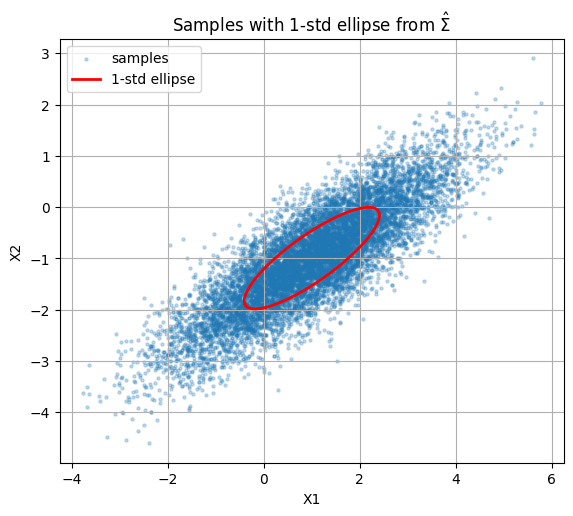

Sample correlation (rho_hat): 0.8408147593598204


In [ ]:
def plot_cov_ellipse(ax, mean, cov, n_std=1.0, num_pts=300, **plot_kwargs):
    """
    Plot the n_std standard deviation ellipse of a 2D Gaussian with given mean and covariance.
    """
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]  
    vals, vecs = vals[order], vecs[:, order]

    theta = np.linspace(0, 2*np.pi, num_pts)
    circle = np.vstack([np.cos(theta), np.sin(theta)])
    
    radii = n_std * np.sqrt(vals)
    scaled = radii[:, None] * circle
    
    ellipse = np.dot(vecs, scaled) + mean[:, None]

    ax.plot(ellipse[0], ellipse[1], linewidth=2, **plot_kwargs)

fig, ax = plt.subplots(figsize=(6.5, 5.5))
ax.scatter(X[:, 0], X[:, 1], s=5, alpha=0.25, label="samples")

plot_cov_ellipse(ax, mu_hat, Sigma_hat, n_std=1.0, color='red', label="1-std ellipse")

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title("Samples with 1-std ellipse from $\hat{\\Sigma}$")
ax.grid(True)
ax.legend(loc="best")
plt.show()

# Sample correlation
rho_hat = Sigma_hat[0, 1] / np.sqrt(Sigma_hat[0, 0] * Sigma_hat[1, 1])
print("Sample correlation (rho_hat):", rho_hat)

**What you do:**

* Use the standard conditional formula for the bivariate normal (Last question of HW1)
* For $x_2 \in \{-2, 0, 2\}$:
    1. Compute the **analytical** conditional mean/variance.
    2. **Empirically** estimate them by subsetting the simulated data to a thin bin around each $x_2$ (half-width $h$).

**Why this matters:**

* Conditionals in MVN are **still normal**, with mean **linear** in the conditioning value and **constant** conditional variance (doesn’t depend on $x_2$).
* Empirical estimates from thin bins should approximate analytical values; widen $h$ if too few points fall in a bin.


In [ ]:
mu1, mu2 = mu[0], mu[1]
Sigma11, Sigma12 = Sigma[0, 0], Sigma[0, 1]
Sigma21, Sigma22 = Sigma[1, 0], Sigma[1, 1]
inv_Sigma22 = 1.0 / Sigma22

def mvn_conditional_params(x2):
    """
    Returns (mean, var) for X1 | X2 = x2 under the true (mu, Sigma).
    """
    cond_mean = mu1 + Sigma12 * inv_Sigma22 * (x2 - mu2)
    
    cond_var = Sigma11 - Sigma12 * inv_Sigma22 * Sigma21
    return cond_mean, cond_var

x2_values = [-2.0, 0.0, 2.0]
h = 0.05  
rows = []

for x2 in x2_values:
    a_mean, a_var = mvn_conditional_params(x2)

    mask = (X[:, 1] >= x2 - h) & (X[:, 1] <= x2 + h)
    X1_slice = X[mask, 0]

    cnt = mask.sum()
    if cnt >= 2:
        e_mean = X1_slice.mean()
        e_var = X1_slice.var(ddof=1)
    else:
        mask2 = (X[:, 1] >= x2 - 2*h) & (X[:, 1] <= x2 + 2*h)
        X1_slice = X[mask2, 0]
        cnt = mask2.sum()
        e_mean = X1_slice.mean() if cnt >= 2 else np.nan
        e_var = X1_slice.var(ddof=1) if cnt >= 2 else np.nan

    rows.append((x2, cnt, a_mean, a_var, e_mean, e_var))

header = f"{'x2':>6} | {'n_in_bin':>8} | {'Analytic mean':>13} | {'Analytic var':>12} | {'Emp. mean':>10} | {'Emp. var':>10}"
print(header)
print("-"*len(header))
for (x2, cnt, a_m, a_v, e_m, e_v) in rows:
    print(f"{x2:6.2f} | {cnt:8d} | {a_m:13.4f} | {a_v:12.4f} | {e_m:10.4f} | {e_v:10.4f}")

a_vars = [mvn_conditional_params(x2)[1] for x2 in x2_values]
assert np.allclose(a_vars, a_vars[0], rtol=1e-10)

    x2 | n_in_bin | Analytic mean | Analytic var |  Emp. mean |   Emp. var
--------------------------------------------------------------------------
 -2.00 |      243 |       -0.2000 |       0.5600 |    -0.2532 |     0.6003
  0.00 |      246 |        2.2000 |       0.5600 |     2.2478 |     0.6523
  2.00 |        4 |        4.6000 |       0.5600 |     4.7727 |     0.6635


**What you do:**

* Construct a nonlinear pair:

    * Sample $Z \sim \mathcal{N}(0, 1)$
    * Set $X_1 = Z$, $X_2 = Z^2 - \mathbb{E}[Z^2]$ (and $\mathbb{E}[Z^2] = 1$ for standard normal).
* Show $\operatorname{Corr}(X_1, X_2) \approx 0$ but the scatter is **parabolic**, implying **dependence**.

**Why this matters:**

* **Correlation** captures only **linear** association. Variables can be strongly **nonlinearly dependent** while having correlation $\approx 0$.

Correlation (X1, X2) in nonlinear example: 0.02721882459906982


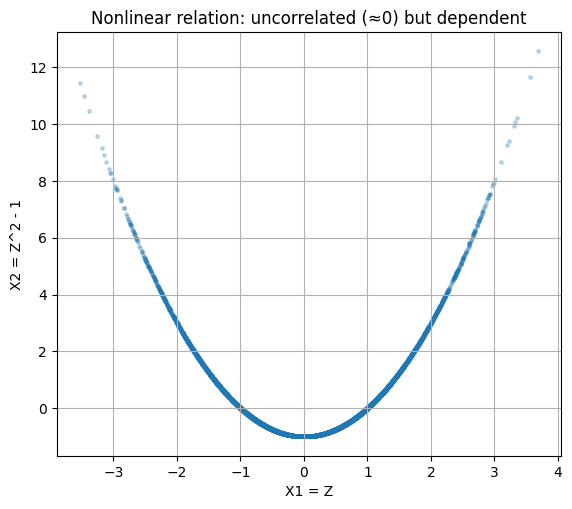

Means (should be ~0): E[X1]≈ 0.014420131340216375   E[X2]≈ 0.006382091089218429


In [ ]:
m = 10000

Z = rng.standard_normal(m)

X1_nl = Z                  
X2_nl = Z**2 - 1          

rho_nl = np.corrcoef(X1_nl, X2_nl)[0, 1]
print("Correlation (X1, X2) in nonlinear example:", rho_nl)

fig, ax = plt.subplots(figsize=(6.5, 5.5))
ax.scatter(X1_nl, X2_nl, s=6, alpha=0.25)
ax.set_xlabel("X1 = Z")
ax.set_ylabel("X2 = Z^2 - 1")
ax.set_title("Nonlinear relation: uncorrelated (≈0) but dependent")
ax.grid(True)
plt.show()

print("Means (should be ~0): E[X1]≈", X1_nl.mean(), "  E[X2]≈", X2_nl.mean())

## Monte-Carlo LLN sanity check

We’ll empirically verify the **Law of Large Numbers** by watching how the error in the sample mean $\lVert \hat{\mu}_n - \mu \rVert_2$ shrinks as the sample size $n$ grows. On a log–log plot, the curve should look roughly like a straight line with slope $-\tfrac{1}{2}$ (because the standard error scales as $1/\sqrt{n}$).

---

### What you’ll do (in plain words)

1. Pick a grid of sample sizes $n$ (small → large).
2. For each $n$, run several **independent trials**. In each trial:
    * Draw $n$ i.i.d. samples from your 2D Gaussian.
    * Compute the sample mean $\hat{\mu}_n$.
    * Record the error $\lVert \hat{\mu}_n - \mu \rVert_2$.
3. Summarize the errors per $n$ (e.g., median and interquartile range).
4. Make a **log–log plot** of error vs $n$.
5. Fit a line to $(\log n, \log \text{error})$ to estimate the slope (expect ≈ $-0.5$).
6. (Nice touch) Overlay a reference guide: $c/\sqrt{n}$ scaled to your first point.


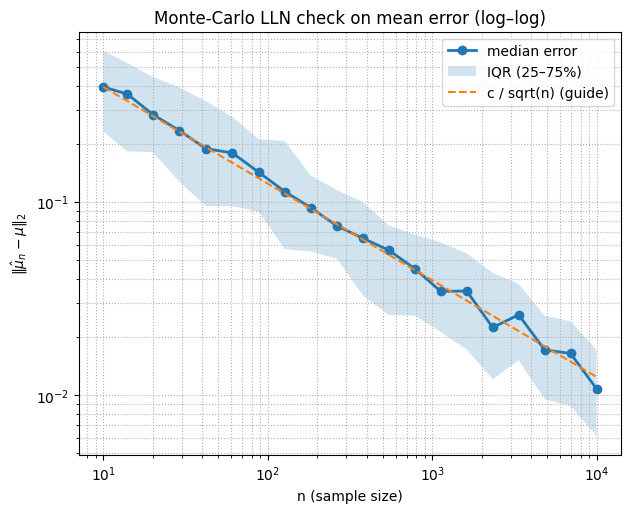

Estimated slope on log-log (median error vs n): -0.507  (expect ≈ -0.5)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)
mu = np.array([1.0, -1.0])
Sigma = np.array([[2.0, 1.2],
                  [1.2, 1.0]])

n_grid = np.logspace(1, 4, num=20, dtype=int)  
trials = 100  

errors_by_n = []
for n in n_grid:
    errs = []
    for _ in range(trials):
        X = rng.multivariate_normal(mu, Sigma, size=n)
        mu_hat = np.mean(X, axis=0)
        errs.append(np.linalg.norm(mu_hat - mu))
    errors_by_n.append(np.array(errs))

errors_by_n = np.array(errors_by_n)

med_err = np.median(errors_by_n, axis=1)
p25_err = np.percentile(errors_by_n, 25, axis=1)
p75_err = np.percentile(errors_by_n, 75, axis=1)

logn = np.log(n_grid)
loge = np.log(med_err)
b, a = np.polyfit(logn, loge, 1)

ref_c = med_err[0] * np.sqrt(n_grid[0])
ref_line = ref_c / np.sqrt(n_grid)

plt.figure(figsize=(7, 5.5))
plt.loglog(n_grid, med_err, marker='o', linewidth=2, label="median error")
plt.fill_between(n_grid, p25_err, p75_err, alpha=0.2, label="IQR (25–75%)")
plt.loglog(n_grid, ref_line, linestyle='--', label="c / sqrt(n) (guide)")

plt.xlabel("n (sample size)")
plt.ylabel(r"$\|\hat{\mu}_n - \mu\|_2$")
plt.title("Monte-Carlo LLN check on mean error (log–log)")
plt.grid(True, which='both', linestyle=':')
plt.legend()
plt.show()

print(f"Estimated slope on log-log (median error vs n): {b:.3f}  (expect ≈ -0.5)")

## Analysis of Data Dispersion

This part builds intuition about **data spread**, **percentiles**, and **outlier detection** using the **box plot** representation.

**What you’ll practice**

* Computing percentiles $( Q_1, Q_2, Q_3 )$ from data.
* Implementing a function to locate percentile indices.
* Deriving the **Interquartile Range (IQR)**:
  
  $$\mathrm{IQR} = Q_3 - Q_1 = q(0.75) - q(0.25)$$
  
  
* Identifying **outliers** using the IQR rule:
  - Lower outliers: values < $  (Q_1 - 1.5 \times \mathrm{IQR} )$
  - Upper outliers: values > $( Q_3 + 1.5 \times \mathrm{IQR} )$
* Drawing box plots **with** and **without** outliers.
* Interpreting how box size and whiskers reflect data dispersion.

**Resources**

For a refresher on the box plot concept and percentile computation, see:  
[link1](https://en.wikipedia.org/wiki/Box_plot)  
[link2](https://www.dummies.com/education/math/statistics/how-to-calculate-percentiles-in-statistics)


First, for the example below, calculate Q1, Q2, and Q3 and also find the outliers.  
Then, draw its box plot.  
Next, draw the box plot again, but this time **without showing the outliers**.
(The pandas boxplot function has an argument to disable displaying outliers.)


example_list = [52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89]

## report Q1, Q2, Q3, outliers, draw boxplot with and without the outliers


Now, you are going to analyze data related to the COVID-19 pandemic.  
This data is provided in a CSV file named `worldometer_data.csv`.

First , read the data using pandas and create a DataFrame.

Then, for the following columns:
- NewCases  
- Population  
- Deaths/1M pop  
- Serious,Critical  

calculate the required values (Q1, Q2, Q3, outliers, etc.) just like in `example_list`,  
and draw the necessary box plots.

Explain which of these columns has the **largest dispersion**.  
Also, in general, explain **what the size of the box represents**.


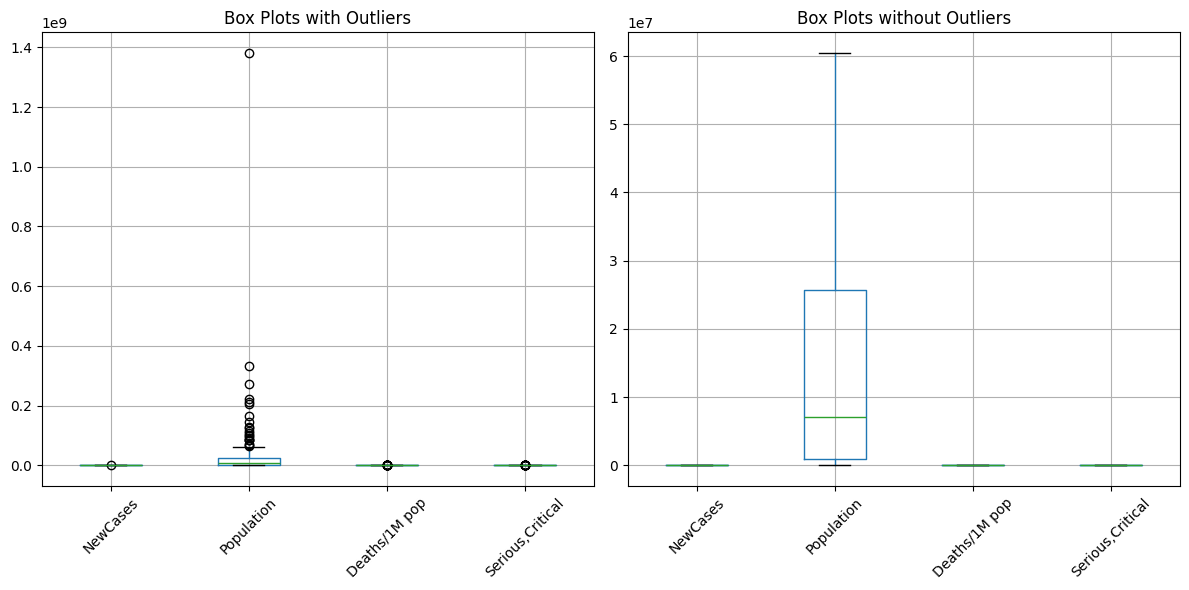


Analysis for NewCases:
Q1: 27.50
Q2 (median): 656.00
Q3: 2609.00
IQR: 2581.50
Number of outliers: 1
Outlier range: [6590.00, 6590.00]

Analysis for Population:
Q1: 966314.00
Q2 (median): 7041972.50
Q3: 25756135.50
IQR: 24789821.50
Number of outliers: 21
Outlier range: [65288306.00, 1381344997.00]

Analysis for Deaths/1M pop:
Q1: 6.00
Q2 (median): 29.00
Q3: 98.00
IQR: 92.00
Number of outliers: 24
Outlier range: [237.00, 1238.00]

Analysis for Serious,Critical:
Q1: 3.25
Q2 (median): 27.50
Q3: 160.25
IQR: 157.00
Number of outliers: 19
Outlier range: [458.00, 18296.00]

Relative Dispersion (Coefficient of Variation):
NewCases: 1.580
Population: 3.444
Deaths/1M pop: 1.773
Serious,Critical: 3.831

Analysis Summary:
1. The size of the box represents the Interquartile Range (IQR = Q3 - Q1),
   which contains the middle 50% of the data.
2. Column with largest dispersion (based on CV): Serious,Critical
3. This indicates the most variable metric relative to its mean value.


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

corona = pd.read_csv("worldometer_data.csv")

def analyze_distribution(data, name):
    data = pd.Series(data).dropna()
    
    Q1 = data.quantile(0.25)
    Q2 = data.median()
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    print(f"\nAnalysis for {name}:")
    print(f"Q1: {Q1:.2f}")
    print(f"Q2 (median): {Q2:.2f}")
    print(f"Q3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier range: [{outliers.min():.2f}, {outliers.max():.2f}]")
    
    return Q1, Q2, Q3, IQR, outliers

plt.figure(figsize=(12, 6))

plt.subplot(121)
corona.boxplot(column=['NewCases', 'Population', 'Deaths/1M pop', 'Serious,Critical'])
plt.title('Box Plots with Outliers')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(122)
corona.boxplot(column=['NewCases', 'Population', 'Deaths/1M pop', 'Serious,Critical'], 
               showfliers=False)
plt.title('Box Plots without Outliers')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

for column in ['NewCases', 'Population', 'Deaths/1M pop', 'Serious,Critical']:
    Q1, Q2, Q3, IQR, outliers = analyze_distribution(corona[column], column)

cv_results = {}
for column in ['NewCases', 'Population', 'Deaths/1M pop', 'Serious,Critical']:
    data = pd.Series(corona[column]).dropna()
    cv = data.std() / data.mean()
    cv_results[column] = cv

print("\nRelative Dispersion (Coefficient of Variation):")
for column, cv in cv_results.items():
    print(f"{column}: {cv:.3f}")

print("\nAnalysis Summary:")
print("1. The size of the box represents the Interquartile Range (IQR = Q3 - Q1),")
print("   which contains the middle 50% of the data.")
print("2. Column with largest dispersion (based on CV):", 
      max(cv_results.items(), key=lambda x: x[1])[0])
print("3. This indicates the most variable metric relative to its mean value.")